# Introduction to programming 4

William Vigor, Clyde Fare and João Pedro Malhado, Imperial College London (contact: [python@imperial.ac.uk](mailto:python@imperial.ac.uk))

Notebook is licensed under a [Creative Commons Attribution 4.0 (CC-by) license](http://creativecommons.org/licenses/by/4.0/).

## Overview

Up to now all our programs have run in their little bubble: they define the variable values they use and after they finish they leave little trace that they were ever run. Things changed a little in the last workshop where we introduced the possibility of the user passing on some information for the program to process. We will go a step further in seeing how we can interact with files.

Dealing and interacting with files is a very common way of processing information stored in a computer, and is something that your programs might often do. When we deal with files and our programs go beyond their "logical bubble", is when we can start doing some damage: delete information on files, delete files all together, fill up the hard disk, damage your installation (the operating system should actually have safeguards for this). This should not intimidate you, it is just that with power it comes responsibility.

In this workshop we will first go over the basic operations on files. Then we will look at a case study of a common case scenario where we want to process a file to extract information in a useful format.

## Dealing with files

In any computer hard-disk there are typically two types of files: text files and binary files. Text files are those you can read with a text editor program (think of Notepad, not Microsoft Word), and do not necessarily contain prose. (If you open this notebook, which has an extension \*.ipynb, on a text editor you will see that it is text in some form. The Jupyter notebook is a text file.) Binary files on the other end cannot be opened on a text editor, or when they do open they show up as ununderstandable characters. (Picture files like PNG or JPEG, music files like MP3, video files, Word DOC files, are all binary files.)

We will only be looking at manipulating text files. Although Python can also manipulate binary files, the caveat of such files is that the programmer needs to know *a priori* how the content of the file is structured, and since one cannot just look at the file on a text editor, this task is harder. Binary files further require knowledge of some low level computer architecture which is beyond the scope of this course. Manipulating text files will however illustrate the process, and most instruments and computer programs are able to write data in some form of text file.

We will start by loading the content of the file <a href="test.out">test.out</a> (you can open the file to look at its content). First we need to open a stream to the file content and set it to a variable. This is done with function *open()*

    stream1=open('test.out','r')

In [1]:
stream1=open('test.out','r')

This takes a string containing the name of our file (including the full path if the file is not in the same directory as the notebook/script) and as a second argument a flag telling Python whether we are going to read or write to the file. ('r' for reading and 'w' for writing).

Via the variable *stream1* we now have direct access to the content of the file. If we loop over the file stream we can read the lines of the file one by one as strings

    for line in stream1:
        print(line)

In [2]:
for line in stream1:
    print(line)

All the leaves are brown,

and the sky is grey,

I went for a walk on a winter's day.



Once we are done with the file we should tidy up, close the stream and leave the file in peace

    stream1.close()

In [3]:
stream1.close()

If we are interested in a list with every line in the file we could build a list with a loop, or simply operate with the function *list()* on the stream

    stream2=open('test.out','r')
    list_content=list(stream2)
    stream2.close()
    list_content

In [4]:
stream2=open('test.out','r')
list_content=list(stream2)
stream2.close()
list_content

['All the leaves are brown,\n',
 'and the sky is grey,\n',
 "I went for a walk on a winter's day.\n"]

Note at the end of each line/list element the linebreak represented by '\n' which counts as a single character.

We should be slightly careful when performing this operations as it puts all the content of the file into a list, which will be unmanageable if the file is several gigabytes in size.

It is just as simple to read a specific number of lines, using a loop and the method *.readline()*

    stream3=open('test.out','r')
    for i in range(2):
        line=stream3.readline()
        print(line)
    stream3.close()

In [5]:
stream3=open('test.out','r')
for i in range(2):
    line=stream3.readline()
    print(line)
stream3.close()

All the leaves are brown,

and the sky is grey,



The house keeping step of closing the stream can be a bit tedious an easily forgotten. The following construct will close the stream for us when we are done

    with open('test.out','r') as stream:
        list_content_again=list(stream)
    list_content_again

In [6]:
with open('test.out','r') as stream:
    list_content_again=list(stream)
list_content_again

['All the leaves are brown,\n',
 'and the sky is grey,\n',
 "I went for a walk on a winter's day.\n"]

If we are just interested in some specific information in the file we can search for it as we read it.

The following code looks for the line with the substring 'leaves' and extracts the colour of the leaves in the text.

In [7]:
with open('test.out','r') as stream:
    for line in stream:
        if 'sky' in line:
            sky_colour = line.split()[4]
        
leaf_colour[:-1]

NameError: name 'leaf_colour' is not defined

Note that the variable *line* is a string with each line in the file. If we are interested in individual words, we can form a list from a string with the **.split()** method.

    "Read my words. One by one.".split()

In [8]:
"Read my words, One by one.".split()

['Read', 'my', 'words,', 'One', 'by', 'one.']

By default *.split()* separates the string on the blank spaces (space or tab characters), but we can choose any other character

    "Read my words. One by one.".split(".")

In [9]:
"Read my words. One by one.".split(".")

['Read my words', ' One by one', '']

For completeness, the opposite operation to *.split()* is performed by *.join()*

    "--".join(['three','two','one','go'])

In [10]:
"--".join(['three','two','one','go'])

'three--two--one--go'

Is it clear how we are obtaining the colour of the leaves? Write some code below that extracts the colour of the sky instead.

In [11]:
with open('test.out','r') as stream:
    for line in stream:
        if 'sky' in line:
            sky_colour = line.split()[4]
        
sky_colour[:-1]

'grey'

The authors of those words were probably not in their best mood. So we are going to change the text to make it more cheerful (even if slightly psychedelic). The goal is thus to construct a list of the verses in the lyrics, but with *blue* leaves, a *bay* sky and a *glorious* day. Let us call this list *cheerful*.

This task could be done in one go with a single *for* loop (if you are feeling confortable you can try to implement such solution). We will however break the task into two. First, create the list *cheerful* where each element is a verse of the original text split into words.

In [12]:
cheerful=[]
with open('test.out','r') as stream:
    for i in stream:
        cheerful=cheerful + i.split()
cheerful

['All',
 'the',
 'leaves',
 'are',
 'brown,',
 'and',
 'the',
 'sky',
 'is',
 'grey,',
 'I',
 'went',
 'for',
 'a',
 'walk',
 'on',
 'a',
 "winter's",
 'day.']

Now change your list such that you replace the wanted words in the text, and put each verse together using the *.join()* mehtod such that *cheerful* is a list of strings with the verses of the lyrics.

In [13]:
cheerful1=[]
for i in cheerful:
    if i == 'brown,':
        i= "blue,"
    if i == 'grey,':
        i='bay,'
    if i == "winter's":
        i="glorious"
    cheerful1=cheerful1+[i]
cheerful1

' '.join(cheerful1)

'All the leaves are blue, and the sky is bay, I went for a walk on a glorious day.'

If we want to write our cheerful version to a file, we just do

    with open('cheerful.out','w') as stream:
        stream.writelines(cheerful)

In [14]:
with open('cheerful.out','w') as stream:
    stream.writelines(cheerful1)

Note that if you open a file for writing you **will overwrite whatever was initially in the file**.

The <a href"https://docs.python.org/3/library/os.html">os module</a> provides many functions for interaction with the operating system, including the file system. We can get the list of the files in the current directory and see if our new created file is in place

    import os
    os.listdir()

In [15]:
import os
os.listdir()

['Ar2.out',
 'Ar.out',
 'He2.out',
 'He.out',
 'Kr2.out',
 'Kr.out',
 'Ne.out',
 'Ne2.out',
 'H2S.xyz',
 'molecule_angle.svg',
 'test.out',
 'prog_workshop4.ipynb',
 '.ipynb_checkpoints',
 'cheerful.out']

### XYZ molecular structure files

A very common type of text file used in chemistry is the <a href="http://openbabel.org/wiki/XYZ_(format)">XYZ file</a> to represent chemical structures. The <a href="H2S.xyz">H2S.xyz</a> file, present in the same directory as the notebook, is an example of such file (you can open it using a molecular viewer program such as Avogadro). If we open the H2S.xyz file on a text editor, we can clearly note the general structure of such files:

* The first line of the file is formed by a single integer number *n* indicating the number atoms present in the chemical structure in the file.
* The second line is a string containing a comment about the file. It is often left blank, but this line must be present.
* It follows *n* lines with the chemical symbol of each atom and its position in space in Cartesian coordinates in Ångström.

In this exercise, we will want to determine what is the bond angle of the H<sub>2</sub>S molecule represented in the H2S.xyz.

First, write some code to extract the position of each atom in the molecule, in the form of a list where each element is another list with the atom coordinates.

In [16]:
coord=[]
with open('H2S.xyz','r') as molecule:
    mol=list(molecule)
    for line in mol[2:]:
        coord=coord+[line.split()]
coord  

[['S', '0.00000000', '0.00000000', '0.10224900'],
 ['H', '0.00000000', '0.96805900', '-0.81799200'],
 ['H', '0.00000000', '-0.96805900', '-0.81799200']]

In [17]:
coord1=[]
for i in coord:
    coord1=coord1 + [i[1:]]
coord1

[['0.00000000', '0.00000000', '0.10224900'],
 ['0.00000000', '0.96805900', '-0.81799200'],
 ['0.00000000', '-0.96805900', '-0.81799200']]

Note that the bond angle can be determined with relative ease, by thinking of the vectors that connect the atom positions:

<img src="molecule_angle.svg" style="width:30%" />

Using arrays from the Numpy module, obtain the two relevant vectors from the atoms' coordinates previously taken from the file.

In [18]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [19]:
v1=array(coord1[0], dtype=float)
v2=array(coord1[1], dtype=float)
v3=array(coord1[2],dtype=float)
vector1=v2-v1
vector2=v3-v1
dot_prod=dot(vector1, vector2)
n1=norm(vector1)
n2=norm(vector2)
n2

1.3356577875945619

Using the <a href="http://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html">dot()</a> and <a href="http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html">norm()</a> functions from the Numpy module, determine the bond angle on the H<sub>2</sub>S molecule.

In [20]:
bond_angle=arccos((dot_prod)/(n1*n2))
bond_angle/pi*180

92.901217143568132

# Part 2

## Ne<sub>2</sub> dissociation: extracting information from files

In this mini-project we will be looking at the dissociation curve of two neon atoms, i.e. how their electronic energy varies with the distance between the two atoms. By analysing this curve, beyond other quantities, it is possible to determine the equilibrium distance between atoms at low temperature.

This task will involve extracting the relevant information from the output file of a quantum chemistry calculation. The file <a href="Ne.out">Ne.out</a> is a fairly typical log file of an electronic structure calculation program, in this case from the <a href="http://www.psicode.org">Psi4</a> program, and corresponds to a calculation of the electronic energy of a single neon atom. By looking at the file one notices that a lot of detail is given about the electronic structure of neon and about the calculation itself. We want to write a program that extracts from the file the relevant information to accomplish the task in hand.

The situation where we have a text file generated by a program or an instrument, and wish to extract some relevant information (for example to make a plot), is a fairly common one both when working in an experimental or computational setting. We will look at how to address this problem.

We will first focus our attention on the energy of an isolated neon atom. We can find this energy expressed in <a href="http://physics.nist.gov/cgi-bin/cuu/Value?hrj">Hartrees</a> towards the end of the Ne.out file on the line

      Total Energy              =    -128.6763534151176600 [H]

Note that the substring "Total Energies" shows up several times in the file, so it is important to search for a substring with the correct number of spaces.
In the cell below remove 'pass' and in its place write some code that will read the log file and set a variable named 'energy_str' to the string with the energy of the neon atom

In [116]:
with open('Ne.out', 'r') as f:
    for line in f:
        if "Total Energy              =" in line:
            energy_str=line
energy_str

'\t Total Energy              =    -128.6763534151176600 [H]\n'

Now we have extracted the energy as a string, modify the code to generate a new variable named 'ne_energy' which contains the energy as a floating point number.

In [117]:
with open('Ne.out', 'r') as f:
    f1=list(f)
    for line in f1:
        if "Total Energy              =" in line:
            energy_str=line
l=energy_str.split()
ne_energy=float(l[3])
ne_energy

-128.67635341511766

Based on the code above, define a function *get_atom_energy()* which receives a string with the name of a file of an atom electronic structure calculation and returns the MP2 total energy from that file.

In [118]:
def get_atom_energy(filename):
    "Return Total Energy"
    with open(filename, 'r') as f:
        f1=list(f)
        for line in f1:
            if "Total Energy              =" in line:
                energy_str=line
    l=energy_str.split()
    ne_energy=float(l[3])
    return ne_energy

We now have a way to extract the energy of a single atom, but we are interested in the energy of 2 atoms as a function of the energy. The file <a href="Ne2.out">Ne2.out</a> contains energies for a neon dimer for different positions of the two atoms.

You can open the file and note that is has the following format:

This format is then repeated giving data for several different coordinates of neon atom pairs. Our task is to extract both the information about atom position (from which we will obtain the distance) and the energy. We will tackle these two problems seperately at first.

The coordinates of the two Ne atoms are specified in Å:

       Center              X                  Y                   Z
    ------------   -----------------  -----------------  -----------------
          NE          0.000000000000     0.000000000000    -0.250000000000
          NE          0.000000000000     0.000000000000     0.250000000000

Unfortunately the two lines have the same format so it is not quite as easy as before to distinguish between lines and extract the data. But we do know that whenever we find a 'Ne' symbol on the line we want to extract the coordinates, but we need a mechanism to distinguish between atom 1 and atom 2.

Study the following cell. In it the code goes through the file line by line, and prints out the neon coordinates specifying which neon atom the coordinates refer to:

In [119]:
#we use the variable first_Ne as a flag to indicate whether the next line with an 'Ne' in it
#will be the first or the second Neon atom. It is initiated to True
first_Ne = True

with open('Ne2.out', 'r') as f:
    for line in f:
        #if we are on the line with the first Ne
        if 'NE' in line.split() and first_Ne:
            print('1: ' + line)
        
            #set the flag to false because the next line with Ne on will be the second Ne
            first_Ne=False
        
        #we are on the line with second Ne
        elif 'NE' in line.split() and not first_Ne:
            print('2: ' + line)

            #set the flag to true because the next line will Ne on with be the first Ne
            first_Ne=True

1:           NE          0.000000000000     0.000000000000    -1.150000000000

2:           NE          0.000000000000     0.000000000000     1.150000000000

1:           NE          0.000000000000     0.000000000000    -1.175000000000

2:           NE          0.000000000000     0.000000000000     1.175000000000

1:           NE          0.000000000000     0.000000000000    -1.200000000000

2:           NE          0.000000000000     0.000000000000     1.200000000000

1:           NE          0.000000000000     0.000000000000    -1.225000000000

2:           NE          0.000000000000     0.000000000000     1.225000000000

1:           NE          0.000000000000     0.000000000000    -1.250000000000

2:           NE          0.000000000000     0.000000000000     1.250000000000

1:           NE          0.000000000000     0.000000000000    -1.275000000000

2:           NE          0.000000000000     0.000000000000     1.275000000000

1:           NE          0.000000000000     0.000000

Modify the cell below so that instead of printing the whole line out every time we find Neon coordinates, instead we just print out a list with the x,y and z coordinates.

In [120]:
first_Ne= True
coordinates=[]
with open('Ne2.out','r') as f:
    for line in f:
        #we are on the line with the first Ne
        if 'NE' in line.split() and first_Ne:
            #set the flag to false because the next line with Ne on will be the second Ne
            first_Ne=False
            coordinates=coordinates+[line.split()[1:]]
        #we are on the line with second Ne
        elif 'NE' in line.split() and not first_Ne:

            #set the flag to true because the next line with Ne on will be the first Ne
            first_Ne=True
            coordinates=coordinates+[line.split()[1:]]
coordinates

[['0.000000000000', '0.000000000000', '-1.150000000000'],
 ['0.000000000000', '0.000000000000', '1.150000000000'],
 ['0.000000000000', '0.000000000000', '-1.175000000000'],
 ['0.000000000000', '0.000000000000', '1.175000000000'],
 ['0.000000000000', '0.000000000000', '-1.200000000000'],
 ['0.000000000000', '0.000000000000', '1.200000000000'],
 ['0.000000000000', '0.000000000000', '-1.225000000000'],
 ['0.000000000000', '0.000000000000', '1.225000000000'],
 ['0.000000000000', '0.000000000000', '-1.250000000000'],
 ['0.000000000000', '0.000000000000', '1.250000000000'],
 ['0.000000000000', '0.000000000000', '-1.275000000000'],
 ['0.000000000000', '0.000000000000', '1.275000000000'],
 ['0.000000000000', '0.000000000000', '-1.300000000000'],
 ['0.000000000000', '0.000000000000', '1.300000000000'],
 ['0.000000000000', '0.000000000000', '-1.325000000000'],
 ['0.000000000000', '0.000000000000', '1.325000000000'],
 ['0.000000000000', '0.000000000000', '-1.350000000000'],
 ['0.000000000000', '0

OK, the task now is to generate a list of distances between the Neon atoms in the dimers. Above you have found a method for distinguishing between the first and second atoms in each dimer and have used it to print out the coordinates of each atom. Below, the function *vect_dist()* calculates the distance between two atoms given the coordinates of each in Cartesian coordinates. (This function could have been defined using arrays, but here we take a more explicit approach)

In [121]:
def vect_dist(x1, y1, z1, x2, y2, z2):
    distance = ( (x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2 )**0.5
    return distance

Adapt the code we wrote before such that we call the *vect_dist()* every time we find the second neon atom, and in this way build a list *dist* with all distances between neon atoms.

In [122]:
dist=[]
first_Ne= True
with open('Ne2.out','r') as f:
    for line in f:
        #we are on the line with the first Ne
        if 'NE' in line.split() and first_Ne:
            l=line.split()[1:]
            x1=float(l[0])
            y1=float(l[1])
            z1=float(l[2])
            first_Ne=False
        #we are on the line with second Ne
        elif 'NE' in line.split() and not first_Ne:
            t=line.split()[1:]
            x2=float(t[0])
            y2=float(t[1])
            z2=float(t[2])
            first_Ne=True

            distance=vect_dist(x1,y1,z1,x2,y2,z2)
            dist=dist+[distance]
dist

[2.3,
 2.35,
 2.4,
 2.45,
 2.5,
 2.55,
 2.6,
 2.65,
 2.7,
 2.75,
 2.8,
 2.95,
 3.0,
 3.05,
 3.1,
 3.15,
 3.2,
 3.25,
 3.3,
 3.35]

Here is a good point to check your answer. The function *check_float()* checks if two numbers are equal with a tolerance of 1&times;10<sup>-8</sup>.

In [123]:
def check_float(float_number, exact_answer):
    tol = 1e-8
    return abs(float_number - exact_answer) < tol

Run the cell bellow and check the output is the same:

In [124]:
correct_answer = [2.3, 2.35, 2.40, 2.45, 2.5, 2.55, 2.60, 2.65, 2.70, 2.75, 2.80, 2.95, 3.00, 3.05 , 3.10, 3.15, 3.20, 3.25, 3.3, 3.35]

for i,d in enumerate(dist):
    if check_float(d, correct_answer[i]):
        print('Success')
    else:
        print("The lists don't match, check your above solutions.")

Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success


We have now successfully extracted the distances between neon atoms from the log file. The next step is to also extract the energies (we already addressed this problem when extracting the energy of a single neon).

Adapt the code you wrote before such that you build both the *dist* and *energies* lists with a single loop through the file.

In [125]:
dist=[]
energies=[]
dist=[]
first_Ne= True
mol_energy= False
with open('Ne2.out','r') as f:
    for line in f:
        #we are on the line with the first Ne
        if 'NE' in line.split() and first_Ne:
            l=line.split()[1:]
            x1=float(l[0])
            y1=float(l[1])
            z1=float(l[2])
            first_Ne=False
        #we are on the line with second Ne
        elif 'NE' in line.split() and not first_Ne:
            t=line.split()[1:]
            x2=float(t[0])
            y2=float(t[1])
            z2=float(t[2])
            first_Ne=True
            mol_energy=True
            distance=vect_dist(x1,y1,z1,x2,y2,z2)
            dist=dist+[distance]
        elif 'Total Energy              =  ' in line and mol_energy:
            energies=energies+[float(line.split()[-2])]
            mol_energy=False
dist+energies

[2.3,
 2.35,
 2.4,
 2.45,
 2.5,
 2.55,
 2.6,
 2.65,
 2.7,
 2.75,
 2.8,
 2.95,
 3.0,
 3.05,
 3.1,
 3.15,
 3.2,
 3.25,
 3.3,
 3.35,
 -257.3508759806244,
 -257.3515014203482,
 -257.3519632198754,
 -257.3522960563401,
 -257.352528591264,
 -257.35268443113716,
 -257.3527828598417,
 -257.3528394280591,
 -257.3528664678371,
 -257.3528735535761,
 -257.3528679338847,
 -257.3528206560993,
 -257.3528035490452,
 -257.3527879372218,
 -257.3527742712665,
 -257.35276267714795,
 -257.35275307746934,
 -257.352745280255,
 -257.35273904093765,
 -257.35273410329955]

Again here is a good point to check you answer. Run the cell below and check the output is the same:

In [126]:
correct_answer = [-257.3508759806243802,-257.3515014203481996,-257.3519632198754152,-257.3522960563400943,-257.3525285912639902,-257.3526844311371633,-257.3527828598416818,-257.3528394280590987,-257.3528664678370887,-257.3528735535761029,-257.3528679338846814,-257.3528206560993112,-257.3528035490451771,-257.3527879372218194,-257.3527742712665258,-257.3527626771479504,-257.3527530774693446,-257.3527452802550215,-257.3527390409376494,-257.3527341032995537]

for i,d in enumerate(energies):
    if check_float(d, correct_answer[i]):
        print('Success')
    else:
        print("The lists don't match, check your above solutions.")

        
correct_answer = [2.3, 2.35, 2.40, 2.45, 2.5, 2.55, 2.60, 2.65, 2.70, 2.75, 2.80, 2.95, 3.00, 3.05 , 3.10, 3.15, 3.20, 3.25, 3.3, 3.35]

for i,d in enumerate(dist):
    if check_float(d, correct_answer[i]):
        print('Success')
    else:
        print("The lists don't match, check your above solutions.")

Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success


Let us now make our solution reusable by defining a function *get_dimer_distance_energy()*, that should receive two strings as arguments: a file name, chemical symbol search pattern. The function should return a list where the first element is a list of distances and the second element a list of energies.

In [127]:
def get_dimer_distance_energy(filename, symbol):
    "Get list of distances and energies from a file"
    dist=[]
    energies=[]
    dist=[]
    g=[]
    first_Ne= True
    mol_energy= False
    with open(filename,'r') as f:
        for line in f:
            #we are on the line with the first Ne
            if symbol in line.split() and first_Ne:
                l=line.split()[1:]
                x1=float(l[0])
                y1=float(l[1])
                z1=float(l[2])
                first_Ne=False
            #we are on the line with second Ne
            elif symbol in line.split() and not first_Ne:
                t=line.split()[1:]
                x2=float(t[0])
                y2=float(t[1])
                z2=float(t[2])
                first_Ne=True
                mol_energy=True
                distance=vect_dist(x1,y1,z1,x2,y2,z2)
                dist=dist+[distance]
            elif 'Total Energy              =  ' in line and mol_energy:
                energies=energies+[float(line.split()[-2])]
                mol_energy=False
            g=[dist]+[energies]
    return g

In [128]:
get_dimer_distance_energy('He2.out','HE')

[[2.5,
  2.612903225806,
  2.725806451612,
  2.83870967742,
  2.951612903226,
  3.064516129032,
  3.177419354838,
  3.290322580646,
  3.403225806452,
  3.516129032258,
  3.629032258064,
  3.74193548387,
  3.854838709678,
  3.967741935484,
  4.08064516129,
  4.193548387096,
  4.306451612904,
  4.41935483871,
  4.532258064516,
  4.645161290322,
  4.75806451613,
  4.870967741936,
  4.983870967742,
  5.096774193548,
  5.209677419354,
  5.322580645162,
  5.435483870968,
  5.548387096774,
  5.66129032258,
  5.774193548388,
  5.887096774194,
  6.0],
 [-5.76184784023732,
  -5.761916417982681,
  -5.761951314270527,
  -5.761967620501213,
  -5.761974162146721,
  -5.761975944492495,
  -5.761975676552606,
  -5.761974723999278,
  -5.761973702586694,
  -5.7619728384737465,
  -5.761972176212938,
  -5.7619716899322935,
  -5.76197133640903,
  -5.761971076455339,
  -5.761970880735439,
  -5.761970729233256,
  -5.761970608884886,
  -5.7619705112520805,
  -5.761970430791741,
  -5.761970363727911,
  -5.76197

## Ne<sub>2</sub> dissociation: analysing the result

Now that we created a mechanism for extracting the data from the text file, let us use it to do some interesting things. First we will plot the data to find the characteristic diatomic energy pattern.

Populating the interactive namespace from numpy and matplotlib


C:\anaconda\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['dist', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


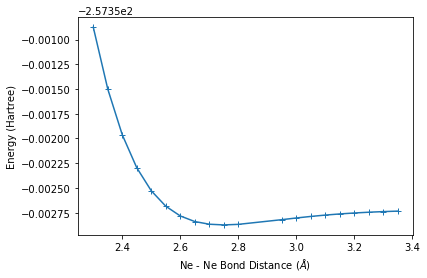

In [129]:
%pylab inline

ne2_data=get_dimer_distance_energy('Ne2.out','NE')
dist=ne2_data[0]
energy=ne2_data[1]

plot(dist, energy, marker='+')
xlabel('Ne - Ne Bond Distance ($\AA$)')
ylabel('Energy (Hartree)')
show()

In chemistry we are more interested in the interaction energy of the two atoms, i.e. the relative energy with respect to 2 separate atoms in space. Subtract twice the energy of a free Ne atom (which we can obtain via the get_atom_energy() function) and plot how interaction energy varies with distance. (It is convenient here to work with arrays instead of lists).

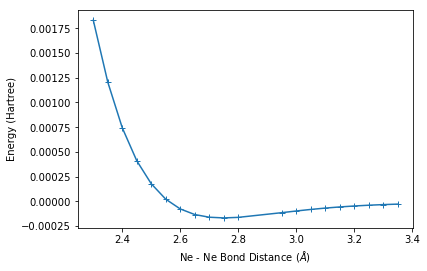

In [130]:
free_energy=get_atom_energy('Ne.out')
energy1=array(energy)-2*free_energy
plot(dist, energy1, marker='+')
xlabel('Ne - Ne Bond Distance ($\AA$)')
ylabel('Energy (Hartree)')
show()

This shape of dissociation curve can be modeled mathematically by the Morse potential:

$$V(r) = d ((1 - e^{-a(r - r_e)})^2 - 1),$$

where *r<sub>e</sub>* is the equilibrium distance, *d* is the dissociation energy, and the *a* is related to the frequency of the potential well.

Write a function to compute the Morse potential with *r*, *r<sub>e</sub>*, *d* and *a* as arguments to the function, making sure the arguments are defined in this order.

In [131]:
def morse(r,re,d,a):
    "Show the Morse potential curve with the above variables"
    V=d*((1-e**-a*(r-re))**2-1)
    return V

Run the cell below to check if your function is defined correctly.

In [132]:
if check_float(morse(2.0, 1.0, 3.2, 5.2) , -0.035208628347242053 ):
    print('Well Done your Morse function works.')
else:
    print('Your Morse function is wrong!')

Well Done your Morse function works.


We are interested on the equilibrium distance and dissociation energy of the neon dimer. In order to obtain these we can use the function *curve_fit()* from the scipy.optimize module. (You may want to revise how to do this from you 1st year course notebooks: if you don't have them in an accessible place you can get them from <a href="https://github.com/imperialchem/python-data-viz-intro/tree/v1.0/workshop3">here</a>).

In the process of fitting you will want to pay attention to the initial parameter guess. How can you extract good guesses for *r<sub>e</sub>* and *d* from the data?

In [148]:
from scipy.optimize import curve_fit
curvy=curve_fit(morse,array(dist), energy1, p0=[2.7,1e-4,0.1])
curvy

(array([  2.65890590e+00,   3.31129088e-04,  -1.22052179e+00]),
 array([[  1.11172917e-03,  -2.13716232e-06,  -1.58339510e-03],
        [ -2.13716232e-06,   6.15275630e-09,   5.04521305e-06],
        [ -1.58339510e-03,   5.04521305e-06,   7.12155355e-03]]))

In [149]:
energy1

array([  1.83084961e-03,   1.20540989e-03,   7.43610360e-04,
         4.10773895e-04,   1.78238971e-04,   2.23990982e-05,
        -7.60296064e-05,  -1.32597824e-04,  -1.59637602e-04,
        -1.66723341e-04,  -1.61103649e-04,  -1.13825864e-04,
        -9.67188099e-05,  -8.11069865e-05,  -6.74410312e-05,
        -5.58469126e-05,  -4.62472340e-05,  -3.84500197e-05,
        -3.22107023e-05,  -2.72730642e-05])

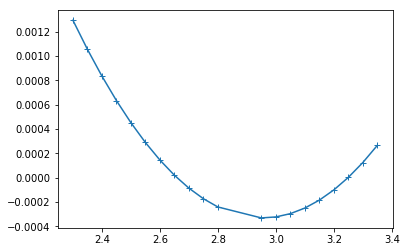

In [150]:
plot(dist, morse(dist, curvy[0][0], curvy[0][1], curvy[0][2]), marker='+')
show()

To check that the fit makes sense. Plot the fitted curve along with original data (to get a smooth curve we should use the function linspace() to plot the fitted curve).

## Extra: Trends along the group

You will find on the same directory as the notebook, besides the log file for the Ne dimer, also log files for He, Ar and Kr. It is interesting to observe the trend of equilibrium distance and dissociation energy along the group. In order to do this it is useful that we automatise the analysis done above.

We shall define two functions, *eqdist_dissenergy()* and *disscurve()* both receiving the same arguments as *get_dimer_distance_energy()*. The *eqdist_dissenergy()* should call *get_dimer_distance_energy()* and *get_atom_energy()*, fit the data to a Morse potential (it should provide adequate guesses for the fit), and returns the values of the equilibrium distance and dissociation energy.

Because fitting blindly is a dangerous thing to do, we should define *disscurve()* which should do most of the same work as *eqdist_dissenergy()* but show us instead the plot of the fitted dissociation curve and original data.

Use the functions defined above to plot the variation of dimer equilibrium distance and dissociation energy along the nobel gas group.

## Summary

Files are an important way of permanent storage of data. Handling files is important not only for processing data generated by instruments or other programs, but also to store results generated by your own programs.

In this workshop we have seen how to access data in files files. The function *open()* creates a stream to access the file content, which can be looped line by line. Each line is retrieved as a string, in which context the string method *.split()* becomes useful for further processing.

We used file processing techniques to extract the data of the dissociation curve of a dimer from a complex file. We further analysed this data to obtain the dissociation energy and equilibrium distance of the dimer.